<a href="https://colab.research.google.com/github/popkdodge/DS-Unit-1-Sprint-2-Statistics/blob/master/module1/LS_DS_121_Statistics_Probability_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 1 Sprint 2 Assignment 1*

# Apply the t-test to real data

Your assignment is to determine which issues have "statistically significant" differences between political parties in this [1980s congressional voting data](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records). The data consists of 435 instances (one for each congressperson), a class (democrat or republican), and 16 binary attributes (yes or no for voting for or against certain issues). Be aware - there are missing values!

Your goals:

1. Load and clean the data (or determine the best method to drop observations when running tests)
2. Using hypothesis testing, find an issue that democrats support more than republicans with p < 0.01
3. Using hypothesis testing, find an issue that republicans support more than democrats with p < 0.01
4. Using hypothesis testing, find an issue where the difference between republicans and democrats has p > 0.1 (i.e. there may not be much of a difference)

Note that this data will involve *2 sample* t-tests, because you're comparing averages across two groups (republicans and democrats) rather than a single group against a null hypothesis.

In [1]:
### YOUR CODE STARTS HERE
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

--2020-05-11 19:02:07--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.07s   

2020-05-11 19:02:07 (270 KB/s) - ‘house-votes-84.data’ saved [18171/18171]



In [0]:
import pandas as pd
import numpy as np
from scipy import stats

In [14]:
column_headers = ['party','handicapped-infants','water-project',
                  'budget','physician-fee-freeze', 'el-salvador-aid',
                  'religious-groups','anti-satellite-ban',
                  'aid-to-contras','mx-missile','immigration',
                  'synfuels', 'education', 'right-to-sue','crime','duty-free',
                  'south-africa']

df = pd.read_csv('house-votes-84.data', names=column_headers)
df = df.replace({"y": 1, "n": 0, "?": np.NaN})
print(df.shape)
df.head()

(435, 17)


,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [0]:
repub_condition = df.party == "republican"

In [16]:
republican = df[repub_condition]
republican

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
7,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,1.0
8,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
10,republican,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,republican,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
430,republican,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
432,republican,0.0,NaN,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0
433,republican,0.0,0.0,0.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,0.0,1.0,1.0,1.0,0.0,1.0


In [0]:
demo_condition = df.party == "democrat"

In [18]:
democrat = df[demo_condition]
democrat

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0
5,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
6,democrat,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,democrat,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN
426,democrat,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
428,democrat,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0
429,democrat,1.0,0.0,1.0,0.0,NaN,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,NaN,1.0,1.0


Issues that republican will votes more for than democrats. Religious-groups


In [30]:
stats.ttest_ind(republican['religious-groups'], democrat['religious-groups'], nan_policy='omit')

Ttest_indResult(statistic=9.737575825219457, pvalue=2.3936722520597287e-20)

In [31]:
republican['religious-groups'].mean()

0.8975903614457831

In [32]:
democrat['religious-groups'].mean()

0.47674418604651164

Issues that democrats will vote similar to republican. Water Project


In [23]:
stats.ttest_ind(democrat['water-project'], republican['water-project'], nan_policy='omit')

Ttest_indResult(statistic=-0.08896538137868286, pvalue=0.9291556823993485)

In [34]:
republican['water-project'].mean()

0.5067567567567568

In [33]:
democrat['water-project'].mean()

0.502092050209205

Issue that democrats will vote more than republican.


In [24]:
stats.ttest_ind(democrat['synfuels'], republican['synfuels'], nan_policy='omit')

Ttest_indResult(statistic=8.293603989407588, pvalue=1.5759322301054064e-15)

In [36]:
republican['synfuels'].mean()

0.1320754716981132

In [37]:
democrat['synfuels'].mean()

0.5058823529411764

## Stretch Goals:

1. Refactor your code into functions so it's easy to rerun with arbitrary variables
2. Work on Performing a T-test without using Scipy in order to get "under the hood" and learn more thoroughly about this topic.
### Start with a 1-sample t-test
 - Establish the conditions for your test 
 - [Calculate the T Statistic](https://blog.minitab.com/hs-fs/hubfs/Imported_Blog_Media/701f9c0efa98a38fb397f3c3ec459b66.png?width=247&height=172&name=701f9c0efa98a38fb397f3c3ec459b66.png) (You'll need to omit NaN values from your sample).
 - Translate that t-statistic into a P-value. You can use a [table](https://www.google.com/search?q=t+statistic+table) or the [University of Iowa Applet](https://homepage.divms.uiowa.edu/~mbognar/applets/t.html)

 ### Then try a 2-sample t-test
 - Establish the conditions for your test 
 - [Calculate the T Statistic](https://lh3.googleusercontent.com/proxy/rJJ5ZOL9ZDvKOOeBihXoZDgfk7uv1YsRzSQ1Tc10RX-r2HrRpRLVqlE9CWX23csYQXcTniFwlBg3H-qR8MKJPBGnjwndqlhDX3JxoDE5Yg) (You'll need to omit NaN values from your sample).
 - Translate that t-statistic into a P-value. You can use a [table](https://www.google.com/search?q=t+statistic+table) or the [University of Iowa Applet](https://homepage.divms.uiowa.edu/~mbognar/applets/t.html)

 ### Then check your Answers using Scipy!

In [0]:
def easy_t_test (sample_a, sample_b):
  print(stats.ttest_ind(sample_a, sample_b, nan_policy='omit'))

In [42]:
easy_t_test(democrat['synfuels'], republican['synfuels'])



Ttest_indResult(statistic=8.293603989407588, pvalue=1.5759322301054064e-15)


In [0]:
def under_the_hood_one_sample (sample, mu):
  #drop NaN values
  no_nan = sample.dropna()
  #finding samplie x_bar values
  x_bar = np.mean(no_nan)
  #finding std of sample
  std = np.std(no_nan)
  #finding the sample amounts
  sample_ammount = len(no_nan)
  #calculate t
  t_score = ((x_bar - mu) / (std / np.sqrt(sample_ammount)))
  print ("T-stats: ", t_score)




In [103]:
under_the_hood_one_sample(coin, 0.5)

T-stats:  coinflips   -0.802572
dtype: float64


In [0]:
#using the link 'https://homepage.divms.uiowa.edu/~mbognar/applets/t.html' my p-value: 0.42412

In [102]:
stats.ttest_1samp(coinflips, 0.5)

Ttest_1sampResult(statistic=-0.7985494095046901, pvalue=0.4264632540527489)

(100, 1)


,coinflips
0,1
1,1
2,1
3,0
4,1


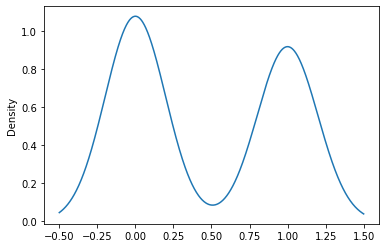

In [101]:

coinflips = np.random.binomial(n=1, p=.5, size=100)

coin = pd.DataFrame({'coinflips': coinflips})

coin['coinflips'].plot.density()

print(coin.shape)
coin.head()

In [0]:
def under_the_hood_two_sample (sample, sample2):
  #drop NaN values
  no_nan = sample.dropna()
  no_nan2 = sample2.dropna()
  #finding samplie x_bar values
  x_bar = np.mean(no_nan)
  x_bar2 = np.mean(no_nan2)
  #finding std of sample
  std = np.std(no_nan)
  std2 = np.std(no_nan2)
  #finding the sample amounts
  sample_ammount = len(no_nan)
  sample_ammount2 = len(no_nan2)
  #calculate t
  t_score = ((x_bar - x_bar2) / np.sqrt((((std)**2)/sample_ammount)+(((std2)**2)/sample_ammount2)))
  print ("T-stats: ", t_score, sample_ammount, sample_ammount2)




In [116]:
stats.ttest_ind(democrat['synfuels'], republican['synfuels'], nan_policy='omit')

Ttest_indResult(statistic=8.293603989407588, pvalue=1.5759322301054064e-15)

In [117]:
under_the_hood_two_sample(democrat['synfuels'], republican['synfuels'])

T-stats:  9.062924986977123 255 159


In [0]:
#the p-score here is 0
